# MA 541 Project

# ONLINE BUSINESS SALES ANALYSIS

Professor: Hadi Safari

Name: Miswa Gandhi

CWID: 20005220

CONTENTS:
1) Introduction
2) Dataset description
3) Data Analysis and Cleaning
4) One Way Anova
5) Two Way Anova
6) Linear Regression
7) T-test
8) Logistic Regression
9) Discussions
10) References

1) Introduction:
Business Statistical Analysis Consumer spending is essential for businesses to thrive. Businesses can use statistical analysis to uncover customer trends and better suit their demands.

Statistical analysis is an unavoidable part of any business. Statistical analysis is the collection, organization, and interpretation of data using mathematical and statistical methodologies.

This information can be used to learn more about what you do now and to forecast future traits or behaviors.
Businesses must understand what their customers buy, how many customers they have, and what activities they do on a daily basis.

It is an important tool for any organization since it allows them to make better decisions and avoid costly mistakes.

Statistical analysis is the application of certain statistical methodologies to a sample of data in order to gain a better knowledge of the entire population. It enables inferences to be established about specific markets, cohorts, and a broad grouping in order to forecast the behavior and features of others.

Part 1: Dataset Description

This is my research caste for the "Online Business Sales 2017-2019" public dataset. The data comes from the online retail sales of an undisclosed company. This dataset contains the columns such as month, Year, total orders, gross sales, discounts, returns, net sales, shipping, total sales.

In [4]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import datetime as dt




In [5]:
#loadthedata

df = pd.read_csv("/Users/miswagandhi/Desktop/data.csv")

In [6]:
df = pd.DataFrame(pd.read_csv("/Users/miswagandhi/Desktop/data.csv"))

In [7]:
df

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [8]:
dataset=df.values


In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
print (df.groupby('Total Sales').mean())


               Year  Total Orders  Gross Sales  Discounts  Returns  Net Sales  \
Total Sales                                                                     
5296.53      2017.0          60.0      5778.50    -172.20 -1017.20    4589.10   
6022.42      2017.0          59.0      5720.00     -88.00  -305.00    5327.00   
6766.66      2017.0          66.0      6480.00     -51.50  -469.20    5959.30   
7059.58      2018.0          82.0      7493.90    -221.25 -1448.02    5824.63   
7103.91      2017.0          54.0      6677.00    -185.75  -253.80    6237.45   
7158.61      2018.0          69.0      6529.20    -161.35  -118.15    6249.70   
7280.05      2017.0          56.0      6908.50    -104.70  -416.20    6387.60   
7318.15      2019.0          63.0      6523.70    -288.70   -38.70    6196.30   
7615.91      2019.0          87.0      7811.75    -261.97 -1250.35    6299.43   
7639.62      2017.0          68.0      7075.00     -61.70  -281.00    6732.30   
7704.25      2018.0         

In [11]:
df.dropna()

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [12]:
df.dropna(how="all")

,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [13]:
df.dropna(subset=["Year","Total Orders"])


,Month,Year,Total Orders,Gross Sales,Discounts,Returns,Net Sales,Shipping,Total Sales
0,January,2017,73,8861.50,-129.40,-448.45,8283.65,1088.30,9371.95
1,February,2017,56,6908.50,-104.70,-416.20,6387.60,892.45,7280.05
2,March,2017,60,5778.50,-172.20,-1017.20,4589.10,707.43,5296.53
3,April,2017,70,8814.00,-281.40,0.00,8532.60,1068.30,9600.90
4,May,2017,54,6677.00,-185.75,-253.80,6237.45,866.46,7103.91
5,June,2017,68,9621.50,-234.45,-17.50,9369.55,1204.32,10573.87
6,July,2017,66,6480.00,-51.50,-469.20,5959.30,807.36,6766.66
7,August,2017,55,8025.00,-258.90,-26.00,7740.10,843.46,8583.56
8,September,2017,68,7075.00,-61.70,-281.00,6732.30,907.32,7639.62
9,October,2017,59,5720.00,-88.00,-305.00,5327.00,695.42,6022.42


In [14]:
df.dropna(inplace=True)

In [15]:
df.Year.unique()

array([2017, 2018, 2019])

## Data Analysis

The data has three distinct years, as seen in the output, and overall sales are increasing every year. December also has the biggest sales.


<AxesSubplot:title={'center':'Net Sales by Years'}, xlabel='Year', ylabel='Total Sales'>

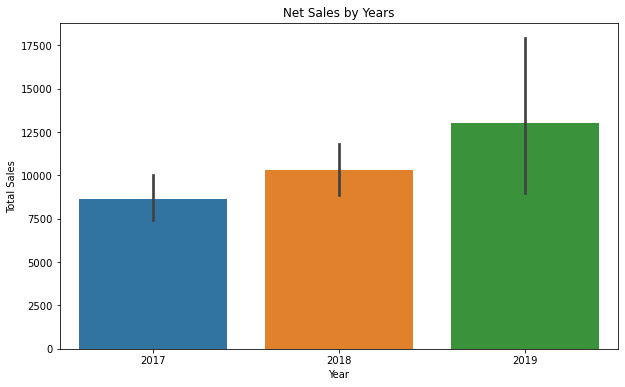

In [16]:
plt.figure(figsize=(10,6))
plt.title("Net Sales by Years")
sns.barplot(x=df['Year'], y=df['Total Sales'])

<AxesSubplot:title={'center':'Net Sales Each Month'}, xlabel='Month', ylabel='Total Sales'>

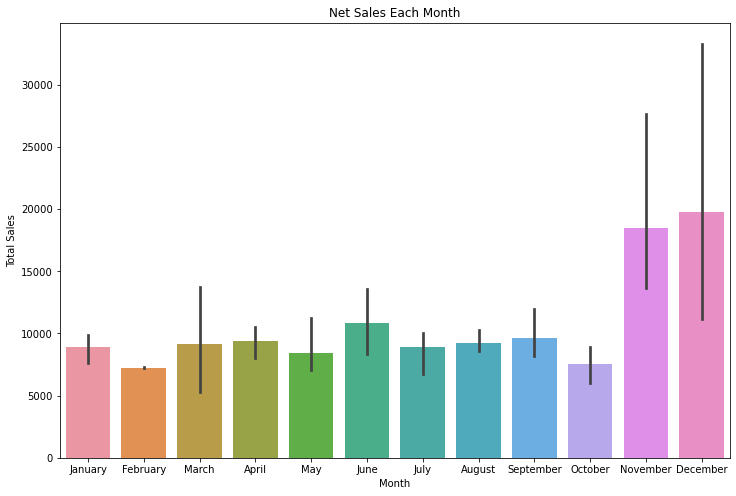

In [17]:
plt.figure(figsize=(12,8))
plt.title("Net Sales Each Month")
sns.barplot(x=df['Month'], y=df['Total Sales'])

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Total Orders'}>,
        <AxesSubplot:title={'center':'Gross Sales'}>],
       [<AxesSubplot:title={'center':'Discounts'}>,
        <AxesSubplot:title={'center':'Returns'}>,
        <AxesSubplot:title={'center':'Net Sales'}>],
       [<AxesSubplot:title={'center':'Shipping'}>,
        <AxesSubplot:title={'center':'Total Sales'}>, <AxesSubplot:>]],
      dtype=object)

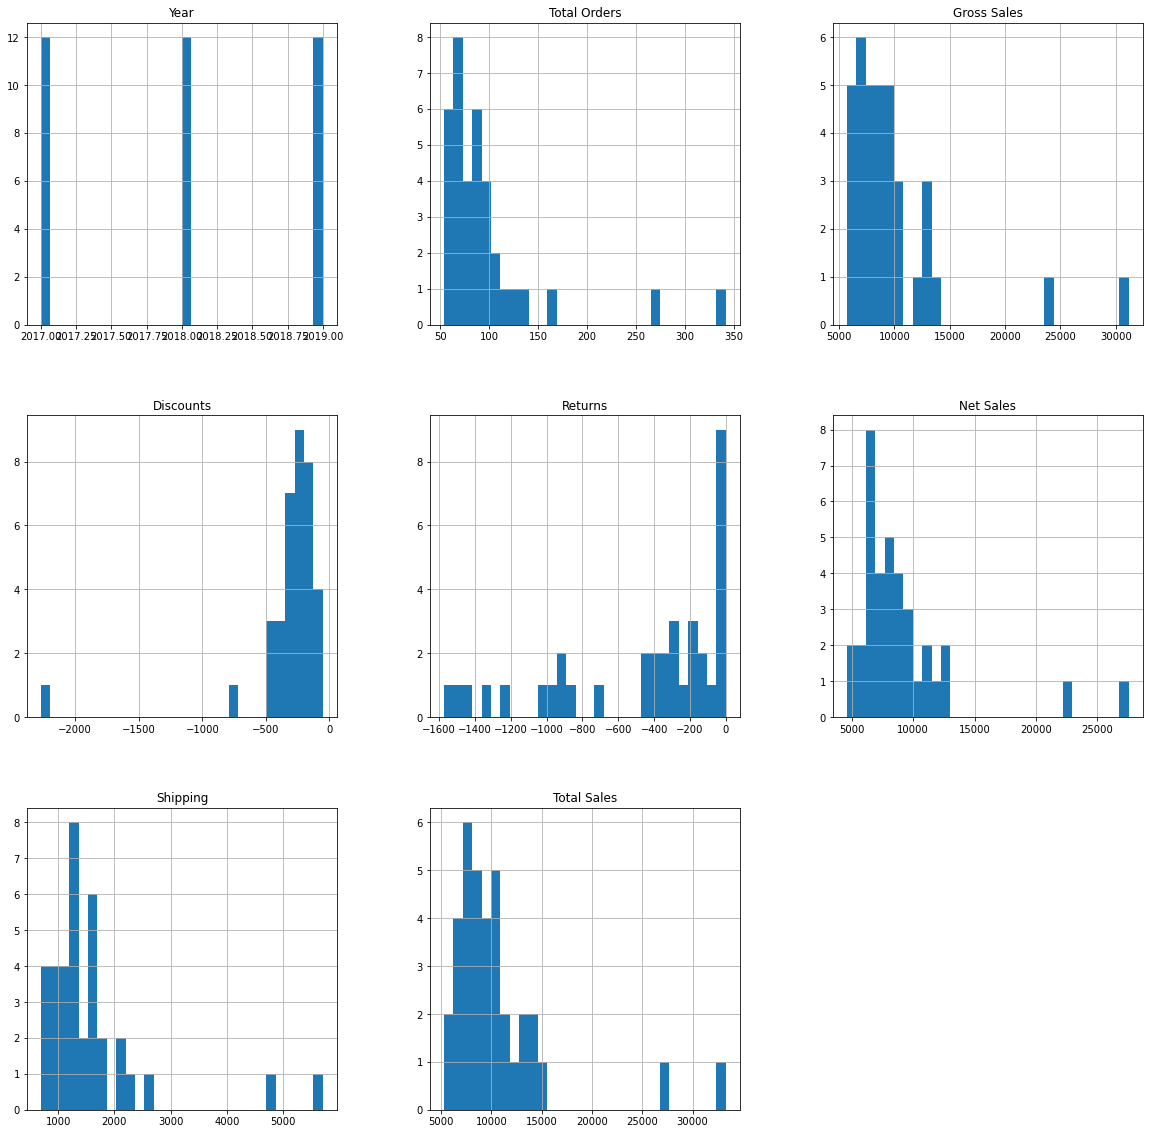

In [18]:
df.hist(bins=30, figsize=(20,20)) #features analysis using Histogram 

<AxesSubplot:>

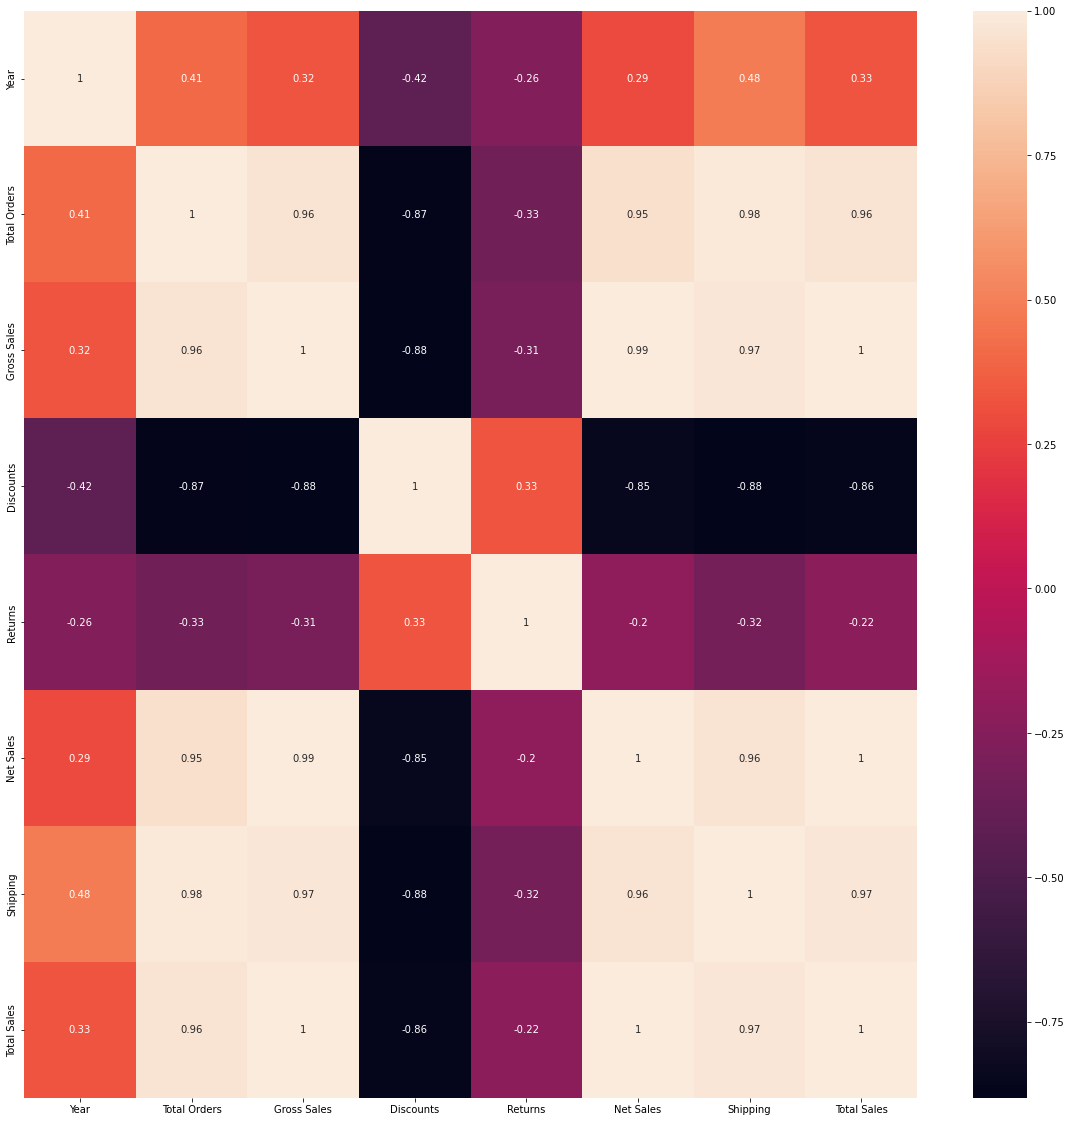

In [19]:
corellations=df.corr()
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corellations,annot=True)

In [21]:
df.groupby('Year')['Total Sales'].sum()

Year
2017    103497.27
2018    123568.28
2019    155900.33
Name: Total Sales, dtype: float64

## One Way Anova

In [91]:
df.groupby('Year')['Total Sales'].agg(['mean', 'std', 'count']).replace(np.nan, 0)

,mean,std,count
Year,,,
2017,8624.772500,2490.856542,12
2018,10297.356667,2686.050317,12
2019,12991.694167,8449.127910,12


In [62]:
df1 = df.head(10)
print(df1)

       Month  Year  Total Orders  Gross Sales  Discounts  Returns  Net Sales  \
0    January  2017            73       8861.5    -129.40  -448.45    8283.65   
1   February  2017            56       6908.5    -104.70  -416.20    6387.60   
2      March  2017            60       5778.5    -172.20 -1017.20    4589.10   
3      April  2017            70       8814.0    -281.40     0.00    8532.60   
4        May  2017            54       6677.0    -185.75  -253.80    6237.45   
5       June  2017            68       9621.5    -234.45   -17.50    9369.55   
6       July  2017            66       6480.0     -51.50  -469.20    5959.30   
7     August  2017            55       8025.0    -258.90   -26.00    7740.10   
8  September  2017            68       7075.0     -61.70  -281.00    6732.30   
9    October  2017            59       5720.0     -88.00  -305.00    5327.00   

   Shipping  Total Sales  
0   1088.30      9371.95  
1    892.45      7280.05  
2    707.43      5296.53  
3   1068.30

One Way Anova

The null hypothesis that two or more groups have the same population mean is tested using the one-way ANOVA. The one-way ANOVA is implemented in Pingouin's anova function. To obtain valid findings from the ANOVA test, three essential assumptions must be met:
1) The samples must be independent
2) Each sample should have a uniform distribution.
3) The samples have the same variance (= homoscedasticity).

The following arguments Should be supplied in order to execute a one-way ANOVA in pingouin:
1) data : the pandas DataFrame
2) dv : the dependent variable
3) between : the between-subject factor
The detailed ANOVA summary table includes the following columns:
• SS : sums of squares
• DF : degrees of freedom
• MS : mean squares (= SS / DF)
• F : F-value (test statistic)
• p-unc : uncorrected p-values
• np2 : partial eta-square effect size *

In [63]:
from pingouin import anova

In [88]:
#run the anova
aov = pg.anova(data=df, dv='Total Sales', between='Year', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Year,1.165080e+08,2,5.825399e+07,2.060702,0.143442,0.111025
1,Within,9.328769e+08,33,2.826900e+07,NaN,NaN,NaN


In [85]:
pg.pairwise_tukey(data=df, dv='Total Sales', between='Year')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,2017,2018,8624.772500,10297.356667,-1672.584167,2170.598933,-0.770563,0.723438,-0.303734
1,2017,2019,8624.772500,12991.694167,-4366.921667,2170.598933,-2.011851,0.125174,-0.793013
2,2018,2019,10297.356667,12991.694167,-2694.337500,2170.598933,-1.241288,0.437911,-0.489279


In [106]:
df.pairwise_tukey(dv='Total Sales', between='Year').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,2017,2018,8624.773,10297.357,-1672.584,2170.599,-0.771,0.723,-0.304
1,2017,2019,8624.773,12991.694,-4366.922,2170.599,-2.012,0.125,-0.793
2,2018,2019,10297.357,12991.694,-2694.338,2170.599,-1.241,0.438,-0.489


In [107]:
k = df['Year'].nunique()  # Number of groups
n = df.shape[0] / k  # Number of observations per group
achieved_power = pg.power_anova(eta=aov.loc[0, 'np2'], k=k, n=n, alpha=0.05)
print('Achieved power: %.4f' % achieved_power)

Achieved power: 0.0500


In [108]:
pg.normality(df, group='Year', dv='Total Sales')

,W,pval,normal
2017,0.948145,0.610046,True
2018,0.925468,0.334541,True
2019,0.664934,0.000395,False


In [109]:
pg.homoscedasticity(df, group='Year', dv='Total Sales')

,W,pval,equal_var
levene,1.364843,0.269462,True


In [111]:
pg.welch_anova(data=df, dv='Total Sales', between='Year')

,Source,ddof1,ddof2,F,p-unc,np2
0,Year,2,20.078461,2.214255,0.135211,0.111025


In [137]:
pg.pairwise_gameshowell(data=df, dv='Total Sales', between='Year')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,2017,2018,8624.772500,10297.356667,-1672.584167,1057.482570,-1.581666,21.875954,0.274476,-0.623446
1,2017,2019,8624.772500,12991.694167,-4366.921667,2542.835176,-1.717344,12.897703,0.236250,-0.676927
2,2018,2019,10297.356667,12991.694167,-2694.337500,2559.339576,-1.052747,13.200968,0.558212,-0.414962


## Two Way Anova

Two-way ANOVA can be used to compare the means of two populations that differ in two ways, for example. It can also be used to examine the mean responses in a two-factor experiment. It allows us to assess the influence of two factors at the same time, unlike One-Way ANOVA. Two Way. ANOVA can be used to compare the means of two populations that differ in two ways, for example. It can also be used to examine the mean responses in a two-factor experiment. It allows us to assess the influence of two factors at the same time, unlike One-Way ANOVA.

In [22]:
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

In [23]:
f1 = 'Discounts ~ Year'

In [24]:
model = smf.ols(f1, data=df).fit()


In [25]:
aov_table = anova_lm(model, typ=2)

In [26]:
print(aov_table)

                sum_sq    df         F   PR(>F)
Year      8.078001e+05   1.0  7.231118  0.01102
Residual  3.798196e+06  34.0       NaN      NaN


In [28]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov
def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov
eta_squared(aov_table)
omega_squared(aov_table)
print(aov_table)

                sum_sq    df         F   PR(>F)   eta_sq  omega_sq
Year      8.078001e+05   1.0  7.231118  0.01102  0.17538  0.147548
Residual  3.798196e+06  34.0       NaN      NaN      NaN       NaN


## Linear Regression

The link between a predictor variable and a response variable is quantified using linear regression. When we run linear regression, we want to know if the predictor variable and the responder variable have a statistically significant relationship. A T-test is used to compare the means of two sets of observable data to see how much of the difference is due to chance. Linear regression is a statistical technique for determining the relationship between one dependent or outcome variable and one or more independent or predictor variables.

In [292]:
import statsmodels.api as sm

In [293]:
y = df['Total Sales'] 
x = df['Year'] 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


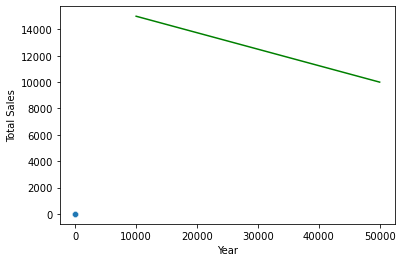

In [300]:
sns.scatterplot(x ,y)
plt.plot([50000,10000], [10000,15000],'g' )


In [304]:
x1 = sm.add_constant(x)
print(x1)

   const  Year
0    1.0     3
1    1.0    10
2    1.0    20


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [305]:

lm = sm.OLS(y,x1).fit()

In [306]:
lm.summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Sales   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     126.8
Date:                Mon, 16 May 2022   Prob (F-statistic):             0.0564
Time:                        02:18:45   Log-Likelihood:                 12.875
No. Observations:                   3   AIC:                            -21.75
Df Residuals:                       1   BIC:                            -23.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0112      0.006      1.817      0.320      -0.067       0.090
Year           0.0053      0.000     11.258      0.056      -0.001       0.011
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.979
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.509
Skew:                          -0.675   Prob(JB):                        0.775
Kurtosis:                       1.500   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
y_pred = 0.0053 * x + 0.012

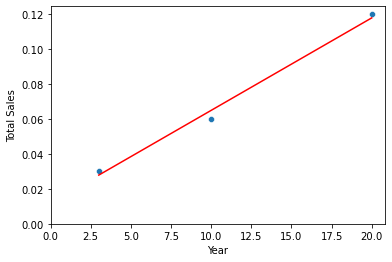

In [310]:
sns.scatterplot(x=x, y=y)
sns.lineplot(x=x,y=y_pred, color='red')

plt.xlim(0)
plt.ylim(0)
plt.show()

## T-Test

A t-test is an inferential statistic that is used to see if there is a significant difference in the means of two groups that are related in some way. It’s most commonly employed when data sets, such as those obtained by flipping a coin 100 times, are expected to follow a normal distribution and have unknown variances. A t-test is a hypothesis testing technique that enables for the testing of a population-based assumption.

In [30]:
pip install researchpy

Note: you may need to restart the kernel to use updated packages.


In [31]:
import researchpy as rp

In [40]:
rp.ttest(group1= df['Total Sales'][df['Month'] == 'January'], group1_name= "January",
         group2= df['Total Sales'][df['Month'] == 'December'], group2_name= "December")

(   Variable    N       Mean            SD           SE    95% Conf.  \
 0   January  3.0   8949.230   1180.175152   681.374442  6017.512397   
 1  December  3.0  19791.820  11857.503678  6845.932940 -9663.852054   
 2  combined  6.0  14370.525   9595.093023  3917.180323  4301.092410   
 
        Interval  
 0  11880.947603  
 1  49247.492054  
 2  24439.957590  ,
                    Independent t-test     results
 0  Difference (January - December) =  -10842.5900
 1               Degrees of freedom =       4.0000
 2                                t =      -1.5760
 3            Two side test p value =       0.1901
 4           Difference < 0 p value =       0.0951
 5           Difference > 0 p value =       0.9049
 6                        Cohen's d =      -1.2868
 7                        Hedge's g =      -1.0294
 8                    Glass's delta =      -9.1873
 9                      Pearson's r =       0.6189)

In [41]:
summary, results = rp.ttest(group1= df['Total Sales'][df['Month'] == 'January'], group1_name= "January",
         group2= df['Total Sales'][df['Month'] == 'December'], group2_name= "December")
print(summary)

   Variable    N       Mean            SD           SE    95% Conf.  \
0   January  3.0   8949.230   1180.175152   681.374442  6017.512397   
1  December  3.0  19791.820  11857.503678  6845.932940 -9663.852054   
2  combined  6.0  14370.525   9595.093023  3917.180323  4301.092410   

       Interval  
0  11880.947603  
1  49247.492054  
2  24439.957590  


In [45]:
import scipy.stats as stats


In [47]:
stats.ttest_ind(df['Total Sales'][df['Month'] == 'January'],
         df['Total Sales'][df['Month'] == 'December'])


Ttest_indResult(statistic=-1.576013303920336, pvalue=0.19014922509846333)

In [53]:
difference = df['Total Sales'][df['Month'] == 'January'].values -\
         df['Total Sales'][df['Month'] == 'December'].values
stats.shapiro(difference)


ShapiroResult(statistic=0.8516465425491333, pvalue=0.24486246705055237)

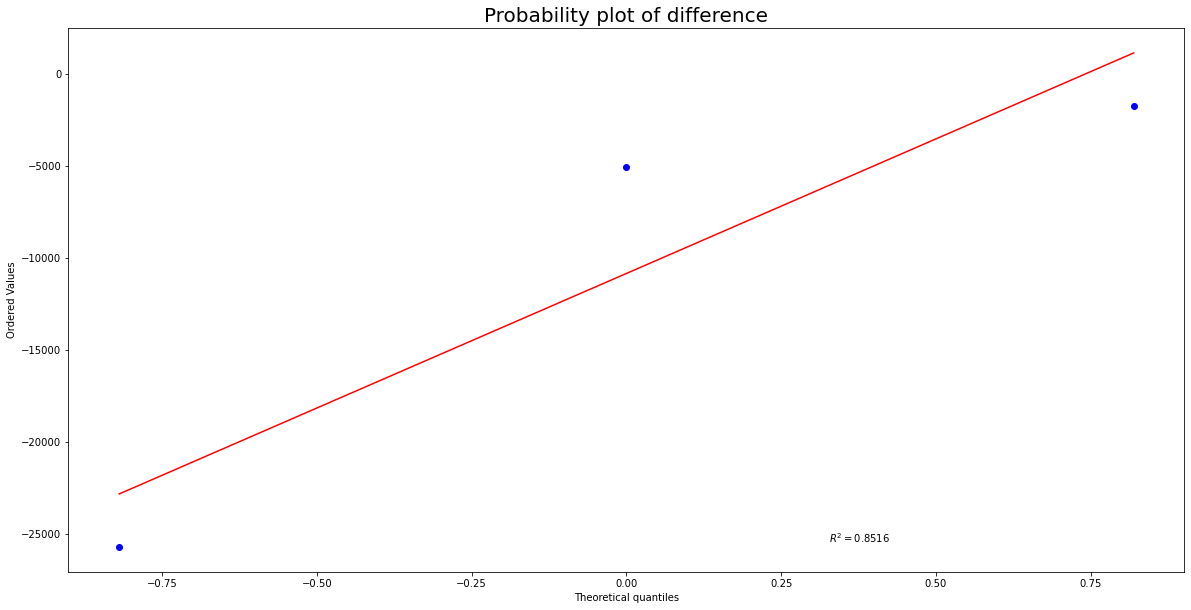

In [54]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of difference", fontsize= 20)
ax.set

plt.show()


## Logistic Regression

In [59]:
import statsmodels.api as sm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
df.select_dtypes('object').head()
print('Levels of categories: ')
for key in df.select_dtypes('object').keys():
    print(key ,':' ,df[key].unique())


Levels of categories: 
Month : ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [63]:
data = pd.get_dummies(df,columns=df.select_dtypes('object').keys(), prefix=df.select_dtypes('object').keys())


In [64]:
data.keys()

Index(['Year', 'Total Orders', 'Gross Sales', 'Discounts', 'Returns',
       'Net Sales', 'Shipping', 'Total Sales', 'Month_April', 'Month_August',
       'Month_December', 'Month_February', 'Month_January', 'Month_July',
       'Month_June', 'Month_March', 'Month_May', 'Month_November',
       'Month_October', 'Month_September'],
      dtype='object')

In [65]:
Y=data['Total Sales']
X=data.drop('Total Sales',axis=1)


In [66]:
est = sm.OLS(Y, X.astype(float)).fit()

In [67]:
X=sm.add_constant(X)
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [68]:
Y_train.values.reshape(-1,1)


array([[11132.85],
       [ 8327.13],
       [ 8024.05],
       [33306.46],
       [ 8911.53],
       [11216.2 ],
       [ 9436.86],
       [ 7639.62],
       [ 7158.61],
       [10573.87],
       [13543.36],
       [ 8434.  ],
       [ 8583.56],
       [13769.75],
       [ 7280.05],
       [ 9859.83],
       [ 7318.15],
       [ 7615.91],
       [ 6766.66],
       [14936.15],
       [ 7103.91],
       [ 9974.13],
       [ 7704.25],
       [ 8764.81],
       [ 6022.42],
       [27681.3 ],
       [ 9600.9 ],
       [ 9371.95]])

In [69]:
import statsmodels.api as sm


In [70]:
regressor_OLS = sm.OLS(endog=Y_train, exog=X_train).fit()

In [71]:
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            Total Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.042e+08
Date:                Mon, 16 May 2022   Prob (F-statistic):           2.75e-41
Time:                        16:03:39   Log-Likelihood:                -2.0918
No. Observations:                  28   AIC:                             40.18
Df Residuals:                      10   BIC:                             64.16
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             214.7780    422.340     

In [73]:
np_normal = pd.Series(np.random.normal(0, 1, 200))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


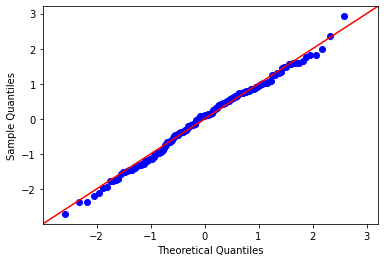

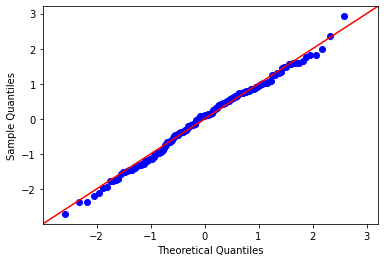

In [74]:
sm.qqplot(np_normal,line='45',fit=True,dist=stats.norm)

In [75]:
np_uniform = pd.Series(np.random.uniform(-5, 5, 200))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


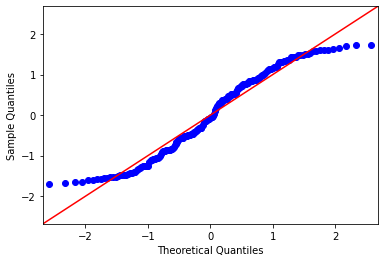

In [76]:
sm.qqplot(np_uniform,line='45',fit=True,dist=stats.norm)
plt.show()

In [78]:
from scipy.stats import skewnorm

In [79]:
skewness = -5 #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=1000, size=50000)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1. 
random = random * 50000  
random = pd.Series(random)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


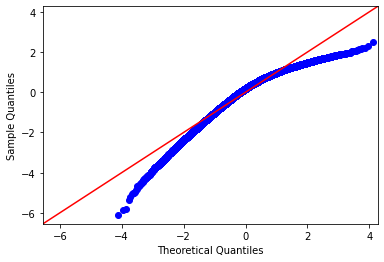

In [80]:
sm.qqplot(random,fit=True,line='45') 
plt.show()

Conclusion

As can be seen from the results, data level and assumptions are important in ANOVA. If the data is nested, the ANOVA procedure used for each group will be different. For binary or multi-class classification, logistic regression is utilized, and the target variable must always be categorical. We can improve by taking additional data samples and doing some pre-processing to gain insights into the data.

References


1) https://www.investopedia.com/terms/t/t-test.asp
2) https://www.kaggle.com/datasets/tylermorse/retail-business-
sales-20172019
3) Discussion on the Statistical Analysis Method
4) https://towardsdatascience.com/anova-analysis-of-variance-explained- b48fee6380af
5) https://medium.com/analytics-vidhya/hypothesis-testing-analysis-of- variance-anova-52c3df0fbc80
6) https://medium.com/swlh/logistic-regression-case-study-statistical- analysis-in-python-d5e3f4efbb30
7) https://github.com/raphaelvallat/pingouin/blob/master/notebooks/ 01_ANOVA.ipynb